<a href="https://colab.research.google.com/github/amalayil23/MLFinalG7/blob/main/ML_Final_Group_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/amalayil23/MLFinalG7



Cloning into 'MLFinalG7'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 252.04 KiB | 4.58 MiB/s, done.


# Description of Features


**pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status.
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels.
The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water.
Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium,
sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water.
This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for
TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to
treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.
The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges
from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water.
Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a
solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources.
TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water,
and < 4 mg/Lit in source water which is use for treatment.

**Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of
organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated.
THM levels up to 80 ppm is considered safe in drinking water.

**Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water
and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for
Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.




In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/MLFinalG7/water_potability.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
#Inspecting amount of null value.

null_data = pd.DataFrame()

feature= []
nullcount =[]
nullPc = []
for i in data.columns:
  feature.append(i)
  nullcount.append(data[i].isnull().sum())
  nullPc.append((((data[i].isnull().sum())/3276)*100).round(2))


null_data["Feature"] = feature
null_data["Null_Count"] = nullcount
null_data["Null %"] = nullPc

null_data.head(10)


,Feature,Null_Count,Null %
0,ph,491,14.99
1,Hardness,0,0.00
2,Solids,0,0.00
3,Chloramines,0,0.00
4,Sulfate,781,23.84
5,Conductivity,0,0.00
6,Organic_carbon,0,0.00
7,Trihalomethanes,162,4.95
8,Turbidity,0,0.00
9,Potability,0,0.00


Total Samples = 3276 <br>
ph- has 491 null values 14.99% <br>
Sulfate - has 781,  null values 23.84% <br>
Trihalomethanes has 162 null values 4.95% .




In [14]:
# Dropping rows with null-value for sulphate as around 25% of values are null in this feature.
data.dropna(subset=['Sulfate'], inplace=True)

#Replacing other missing values with mean.
col_mean = data.mean()
data.fillna(col_mean, inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2495 non-null   float64
 1   Hardness         2495 non-null   float64
 2   Solids           2495 non-null   float64
 3   Chloramines      2495 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     2495 non-null   float64
 6   Organic_carbon   2495 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2495 non-null   float64
 9   Potability       2495 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.4 KB


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2495.000000  2495.000000   2495.000000  2495.000000  2495.000000   
mean      7.083824   196.213489  22065.860761     7.119219   333.775777   
std       1.460755    32.689075   8763.541797     1.584166    41.416840   
min       0.227499    47.432000    320.942611     0.352000   129.000000   
25%       6.284685   176.855409  15623.966291     6.121563   307.699498   
50%       7.083824   197.142637  21043.626929     7.135063   333.073546   
75%       7.859798   216.421982  27372.857057     8.106435   359.950170   
max      14.000000   317.338124  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2495.000000     2495.000000      2495.000000  2495.000000  2495.000000  
mean     425.529584       14.328318        66.293795     3.967982     0.394790  
std       80.774995        3.308675        15.681253     0.782624     0.488903  


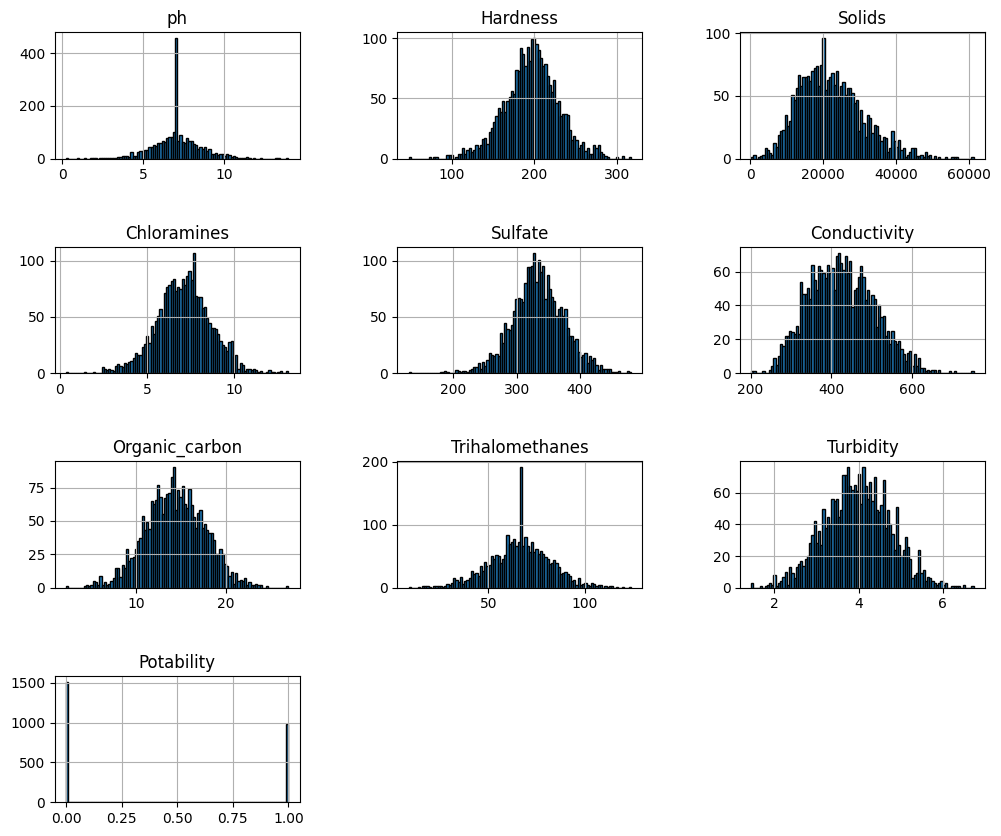

In [17]:
print(data.describe())
data.hist(figsize=(12, 10), bins=100, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()